In [2]:
import sympy
from sympy.physics.quantum import Bra, Ket
from sympy import Matrix
from sympy.physics.quantum import TensorProduct
from sympy.physics.quantum.gate import HadamardGate,CNotGate, IdentityGate
from sympy.physics.quantum.qapply import qapply
from sympy import eye

from sympy.physics.quantum import Ket
from sympy import sqrt

sympy.init_printing()

In [3]:
#definition des états
ket0 = Matrix([1,0])
ket1 = Matrix([0,1])


In [4]:
I=eye(2)
notgate=Matrix([[0,1], [1,0]])
Hgate = Matrix([[1/sqrt(2),1/sqrt(2)], [1/sqrt(2),-1/sqrt(2)]])
Zgate=Matrix([[1,0], [0,-1]])

SWAP = Matrix ([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])
cnotgate = TensorProduct(I,ket0*ket0.T) + TensorProduct(notgate, ket1*ket1.T) # second qubit is the control



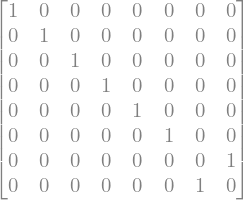

In [5]:
toffoliGate = TensorProduct(ket0*ket0.T,I,I) +TensorProduct(ket1*ket1.T,TensorProduct(ket0*ket0.T,I) + TensorProduct(ket1*ket1.T,notgate))
toffoliGate

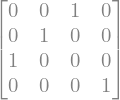

In [6]:
tmp=TensorProduct(I,ket1*ket1.T) + TensorProduct(notgate,ket0*ket0.T)
tmp

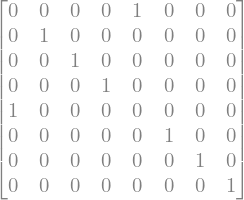

In [7]:
Uf_00=TensorProduct(I,I,ket1*ket1.T) + TensorProduct(tmp,ket0*ket0.T)
Uf_00

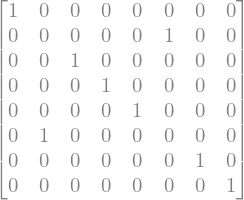

In [8]:
Uf_01=TensorProduct(I,I,ket0*ket0.T) + TensorProduct(TensorProduct(I,ket1*ket1.T)+TensorProduct(notgate,ket0*ket0.T),ket1*ket1.T)
Uf_01

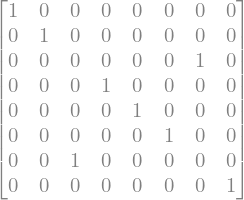

In [9]:
Uf_10=TensorProduct(I,I,ket1*ket1.T) + TensorProduct(TensorProduct(I,ket0*ket0.T)+TensorProduct(notgate,ket1*ket1.T),ket0*ket0.T)
Uf_10

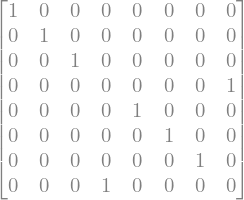

In [10]:
Uf_11 = TensorProduct(I,I,ket0*ket0.T) + TensorProduct(TensorProduct(I,ket0*ket0.T)+TensorProduct(notgate,ket1*ket1.T),ket1*ket1.T)
Uf_11

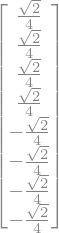

In [17]:
TensorProduct(Hgate*ket1,Hgate*ket0,Hgate*ket0)


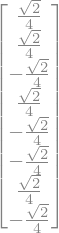

In [48]:
Uf_10*TensorProduct(Hgate*ket1,Hgate*ket0,Hgate*ket0)

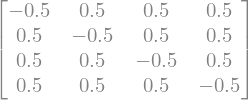

In [13]:
Ub4measure = (1/2)*Matrix([
    [-1, 1, 1, 1], 
    [1, -1, 1, 1], 
    [1, 1, -1, 1], 
    [1, 1, 1, -1]
])
Ub4measure

In [28]:
Ub4measure.det()

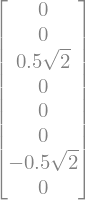

In [59]:
TensorProduct(I, Ub4measure)*TensorProduct(I,Hgate,Hgate)*Uf_01*TensorProduct(Hgate*ket1,Hgate*ket0,Hgate*ket0)

In [ ]:
# Kraus-Cirac decomposition


$$
fd = -1\times\vert0\rangle\langle0\vert + \vert0\rangle\langle1\vert + \vert1\rangle\langle0\vert - 1\times \vert1\rangle\langle1\vert
$$

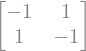

In [61]:
fd = -1*ket0*ket0.T+1*ket0*ket1.T+1*ket1*ket0.T-1*ket1*ket1.T
fd

$$
I \oplus fd
$$

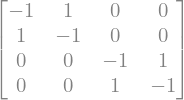

In [57]:
TensorProduct(I,fd)

$$
sd = \vert0\rangle\langle0\vert + \vert0\rangle\langle1\vert + \vert1\rangle\langle0\vert + \vert1\rangle\langle1\vert
$$

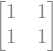

In [58]:
sd = 1*ket0*ket0.T+1*ket0*ket1.T+1*ket1*ket0.T+1*ket1*ket1.T
sd

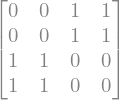

In [42]:
TensorProduct(notgate,sd)

$$
U = \frac{1}{2}*(I \oplus fd + NOT \oplus sd)
$$

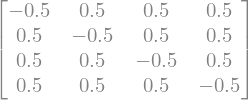

In [45]:
(1/2)*(TensorProduct(I,fd) + TensorProduct(notgate,sd))

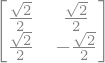

In [64]:
Hgate

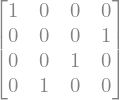

In [65]:
cnotgate


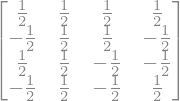

In [67]:
TensorProduct(I, Zgate)*cnotgate*TensorProduct(Hgate, Hgate)

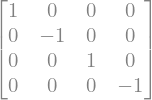

In [68]:
TensorProduct(I, Zgate)


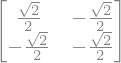

In [77]:
Zgate*Hgate*Zgate
